# Exploratory Data Analysis

In [1]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [2]:
# create the dataframe
cwd = os.getcwd()
df = pd.read_csv(cwd+"/../Data_cleaning/cleaned_BA_reviews.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)

In [3]:

df.head()

reviews           name  stars   
0  ✅ Trip Verified |. The BA first lounge at Term...     E Michaels    5.0  \
1  Not Verified | Paid a quick visit to Nice yest...  Steve Bennett    2.0   
2  ✅ Trip Verified |  Words fail to describe this...        N Mayle    4.0   
3  ✅ Trip Verified |  Absolutely terrible experie...        E Heale    2.0   
4  ✅ Trip Verified | BA overbook every flight to ...        H Mike     1.0   

  date_of_review         country       locations date_of_travel   
0     2023-05-22  United Kingdom  United Kingdom     2023-05-01  \
1     2023-05-22  United Kingdom  United Kingdom     2023-05-01   
2     2023-05-19   United States   United States     2022-09-01   
3     2023-05-17   United States   United States     2023-04-01   
4     2023-05-17  United Kingdom  United Kingdom     2023-05-01   

      travel_type       seat_type                      route   verified   
0        Business  Business Class  London Heathrow to Malaga       True  \
1  Couple Leisure  Business Class              London to Nice     False   
2    Solo Leisure  Business Class     London to San Francisco      True   
3    Solo Leisure   Economy Class            London to Dallas      True   
4        Business   Economy Class            London to Madrid      True   

                                              corpus  
0  ba first lounge terminal zoo pm dirty table us...  
1  verified paid quick visit nice yesterday heath...  
2  word fail describe last awful flight baby acro...  
3  absolutely terrible experience app would let c...  
4  ba overbook every flight maximise income regar...

What is the average overall rating given for British Airways?

In [4]:
df.stars.mean()

4.718961625282167

What is the total counts for each ratings?

Text(0.5, 0.98, 'Counts for each ratings')

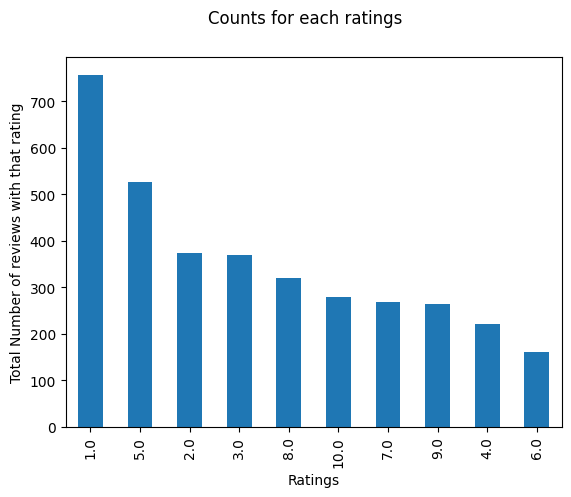

In [5]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [6]:
df_ratings = pd.DataFrame(df['stars'].value_counts())
pct_values = (df_ratings.values/ df_ratings.values.sum() *100).tolist()

pct_values = [round(x[0],2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [7]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()

In [8]:
# renaming columns
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [9]:
df_ratings

total_counts  count  pct_values
0           1.0    757       21.36
1           5.0    527       14.87
2           2.0    374       10.55
3           3.0    369       10.41
4           8.0    321        9.06
5          10.0    279        7.87
6           7.0    269        7.59
7           9.0    264        7.45
8           4.0    222        6.26
9           6.0    162        4.57

Text(0.5, 1.0, 'Counts for each ratings')

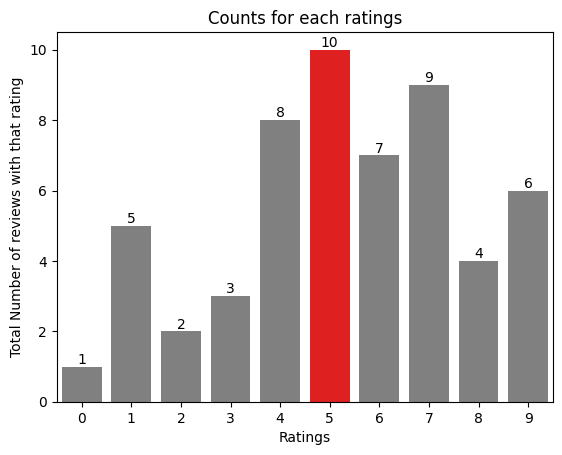

In [11]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.index, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [12]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

69 unique countries


Which country most review comes from?

In [13]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [14]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)
df_country_review

total_reviews  count
0  United Kingdom   2248
1   United States    382
2       Australia    155
3          Canada    112
4         Germany     60

Text(0.5, 1.0, 'Maximum number of review by country')

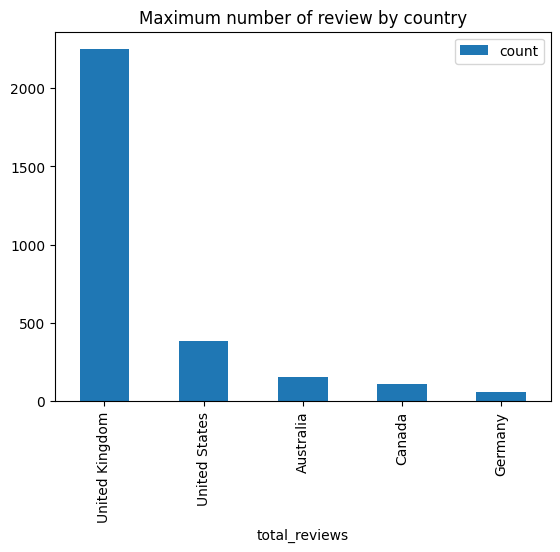

In [15]:
df_country_review.plot(kind="bar", x='total_reviews')
plt.title("Maximum number of review by country")

Which country provided on average highest ratings?

In [16]:
df_country_rating = df[['country','stars']].groupby('country').mean()['stars'].sort_values(ascending=False).reset_index()

In [17]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

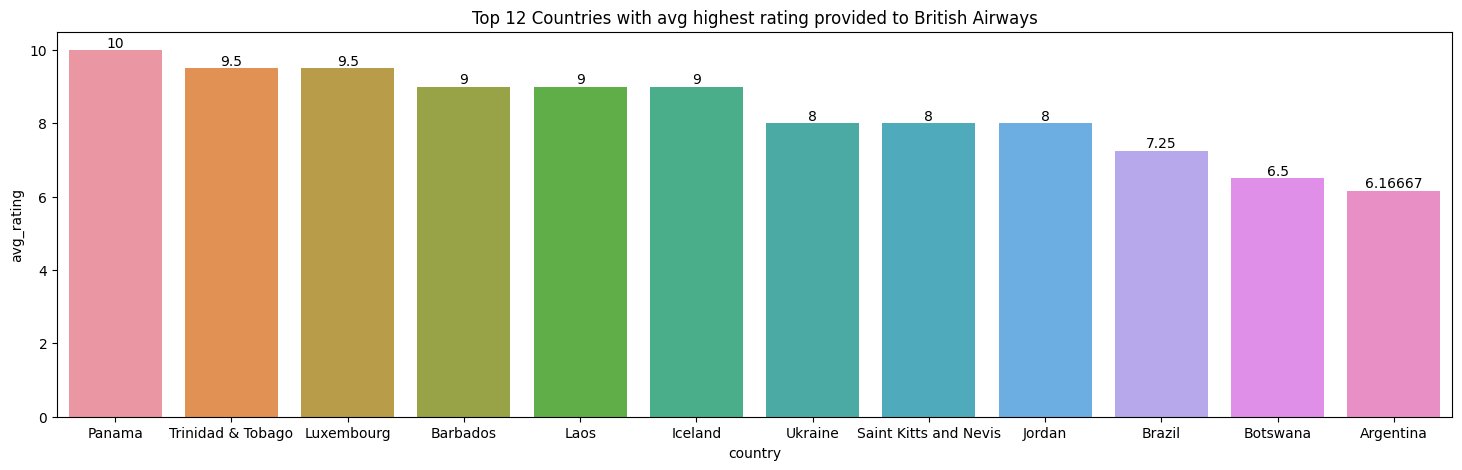

In [18]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

what type of traveller provided highest rating

In [37]:
df_tt_rating = df[['travel_type','stars']].groupby('travel_type').count()['stars'].sort_values(ascending=False).reset_index()

In [23]:
df_tt_rating

travel_type  stars
0  Couple Leisure    939
1    Solo Leisure    848
2        Business    620
3  Family Leisure    373

In [24]:
df_tt_rating.rename(columns={'stars':'total_rating'}, inplace=True)

Text(0.5, 1.0, 'avg rating provided to British Airways by the type of traveller')

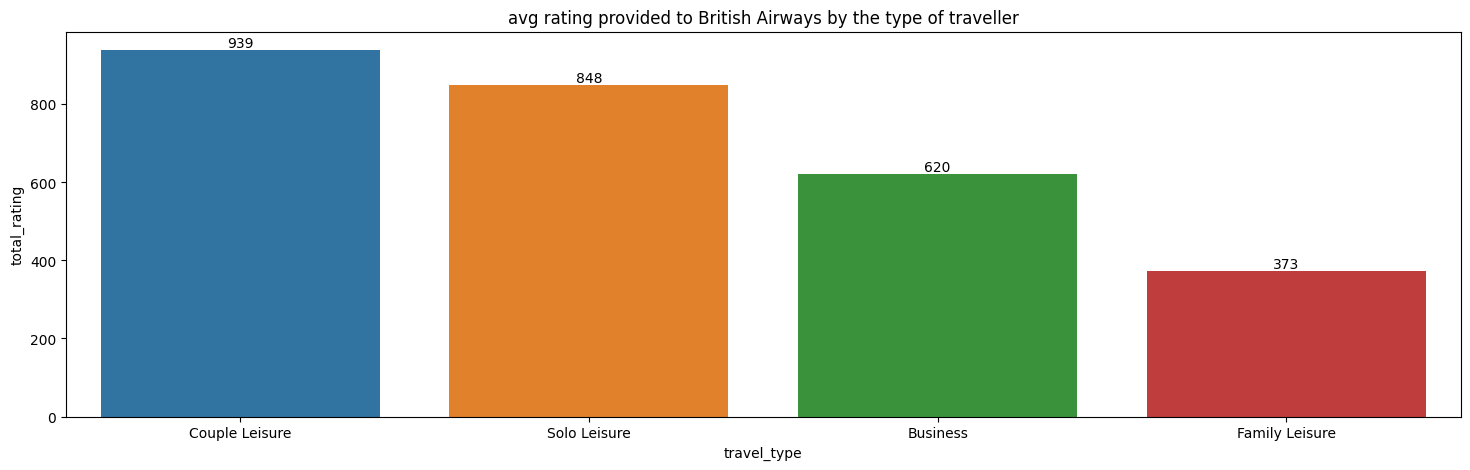

In [27]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='travel_type', y='total_rating', data=df_tt_rating)
ax.bar_label(ax.containers[0])
ax.set_title("rating provided to British Airways by the type of traveller")

which type of seat got hightest rating

In [28]:
df.seat_type.value_counts()

seat_type
Economy Class      1827
Business Class     1150
Premium Economy     356
First Class         210
Name: count, dtype: int64

In [29]:
df_st_rating = df[['seat_type','stars']].groupby('seat_type').count()['stars'].sort_values(ascending=False).reset_index()

In [30]:
df_st_rating.rename(columns={'stars':'total_ratings'}, inplace=True)

Text(0.5, 1.0, 'avg rating provided to British Airways based on seat type')

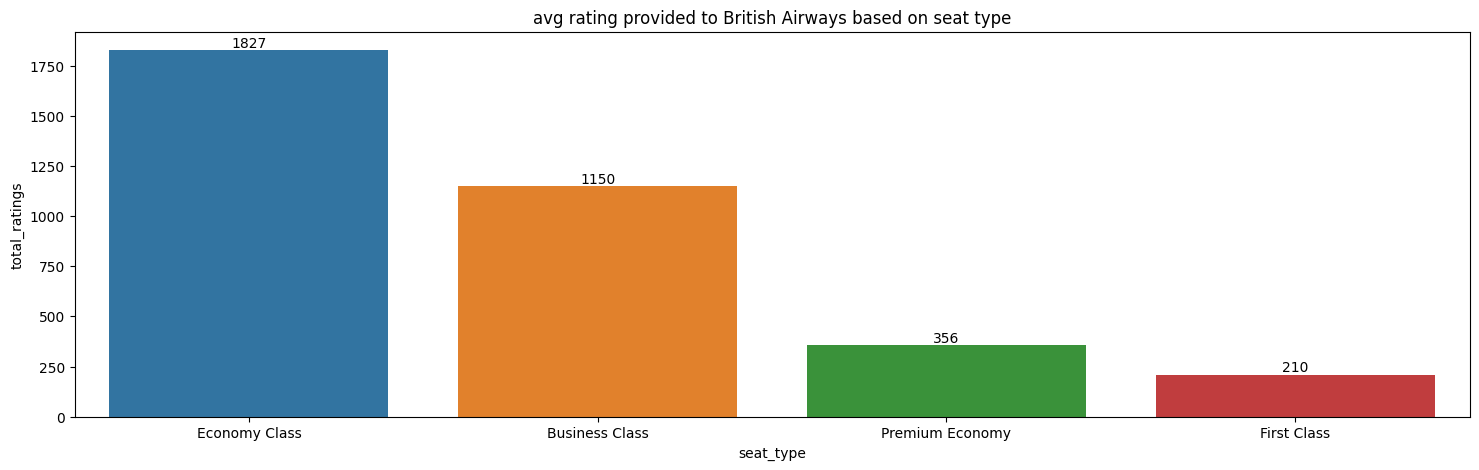

In [31]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='seat_type', y='total_ratings', data=df_st_rating)
ax.bar_label(ax.containers[0])
ax.set_title("rating provided to British Airways based on seat type")

Routes with best and least ratings

In [33]:
df_route_rating = df[['route ','stars']].groupby('route ').mean()['stars'].sort_values(ascending=False).reset_index()

In [34]:
df_route_rating

route   stars
0               London to Johannesburg     16
1                  London to Cape Town     15
2                  Cape Town to London     13
3                           LHR to MIA     13
4                  Vancouver to London     13
...                                ...    ...
1519                LAX to FCO via LHR      1
1520                LAX to AMS via LHR      1
1521    Kuwait to Edinburgh via London      1
1522  Kuala Lumpur to Miami via London      1
1523                   lgw to alicante      1

[1524 rows x 2 columns]

In [35]:
df_route_rating .rename(columns={'stars':'total_ratings'}, inplace=True)

In [41]:
df_route_rating[df_route_rating['total_rating']>= 10]

route   avg_rating
0                    London Gatwick to Malaga        10.0
1    Chicago to Hyderabad via London Heathrow        10.0
2            Calgary to Gothenburg via London        10.0
3                London Heathrow to Marrakech        10.0
4           London Heathrow to Larnaca Cyprus        10.0
..                                        ...         ...
68                        Heathrow to Bangkok        10.0
69                         BAH to BOS via LHR        10.0
70                         Zurich to Heathrow        10.0
71                         ATH to LAX via LHR        10.0
72  Los Angeles to Leeds via London Heathrow         10.0

[73 rows x 2 columns]

A total of 73 routes got 10 ratings

In [43]:
df_route_rating[df_route_rating['avg_rating']== 1]

route   avg_rating
1276           TLV to SAN via LHR         1.0
1277  Sofia to Belfast via London         1.0
1278           Gatwick to Seville         1.0
1279   Gatwick to Fort Lauderdale         1.0
1280           Gatwick to Madeira         1.0
...                           ...         ...
1518                   LGW to VLC         1.0
1519                   LHR to AMM         1.0
1520                   LHR to FCO         1.0
1521                   LHR to GIB         1.0
1522        Bridgetown to Gatwick         1.0

[247 rows x 2 columns]

A total of 247 routes got 1 ratings

Time Series Analysis

In [19]:
#convert the date datatype to datetime

df.date_of_review = pd.to_datetime(df.date_of_review, format="mixed")

In [20]:
fig = px.line(df, x='date_of_review', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

Based on the available data, it is observed that the number of reviews declined between April 2020 and August 2021, likely due to travel restrictions imposed during the Covid-19 pandemic. However, it is important to note that these dates represent when customers posted their reviews, which may not align with the actual flight dates. Therefore, it is difficult to draw any conclusive trends from the plot at this stage.

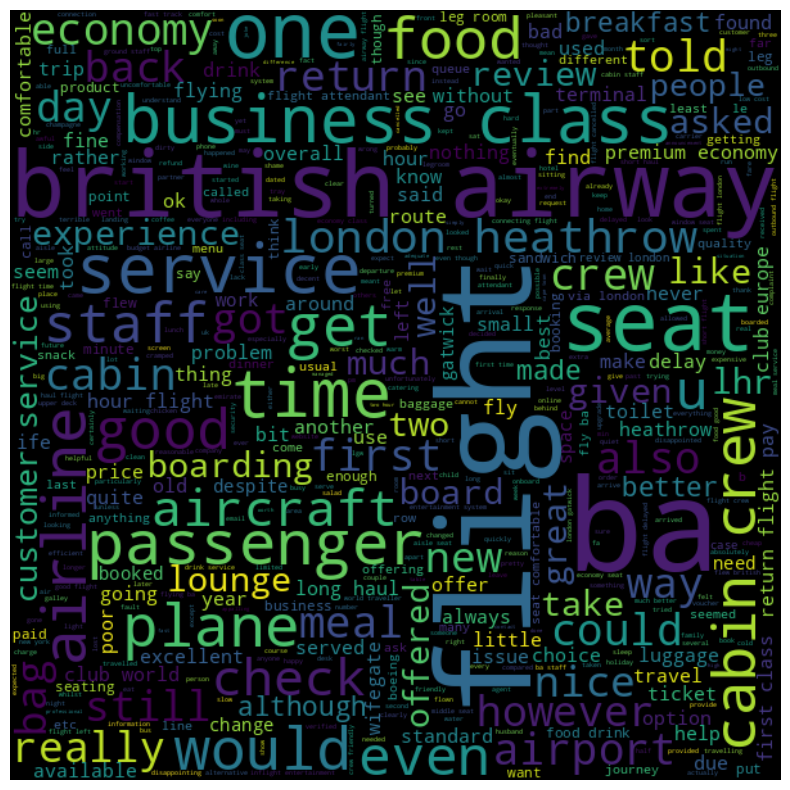

In [21]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Several words, such as "passenger" and "flight," do not contribute to determining whether a review is positive or negative. These words lack conclusive meaning in the sentiment analysis context. Therefore, it would be beneficial to include them in the stopwords list to exclude them from further analysis.

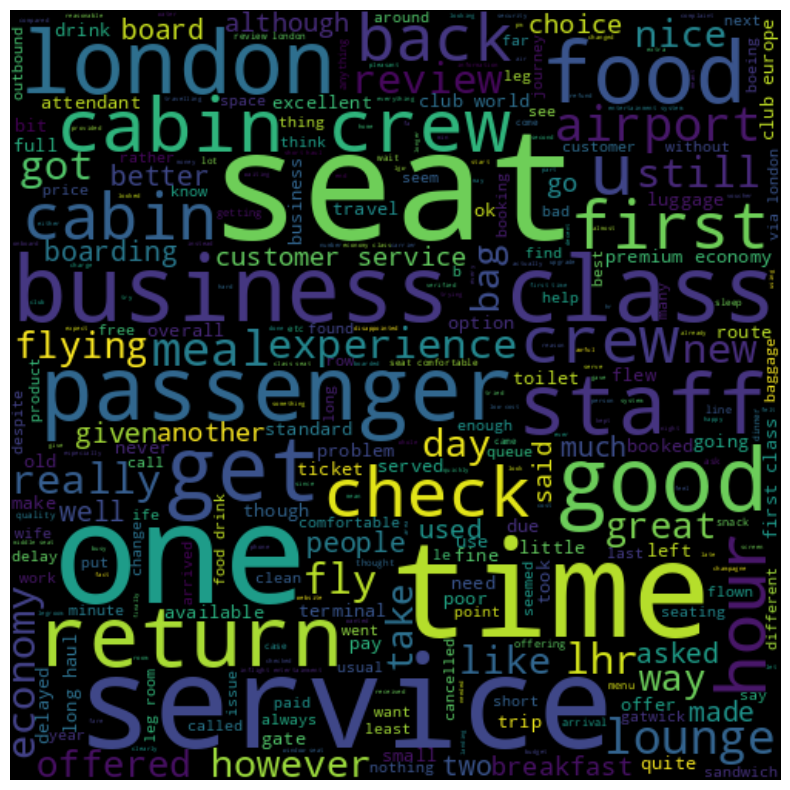

In [22]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Frequency

In [23]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'staff'),
  Text(10, 0, 'business'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'club'),
  Text(17, 0, 'lounge'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'experience')])

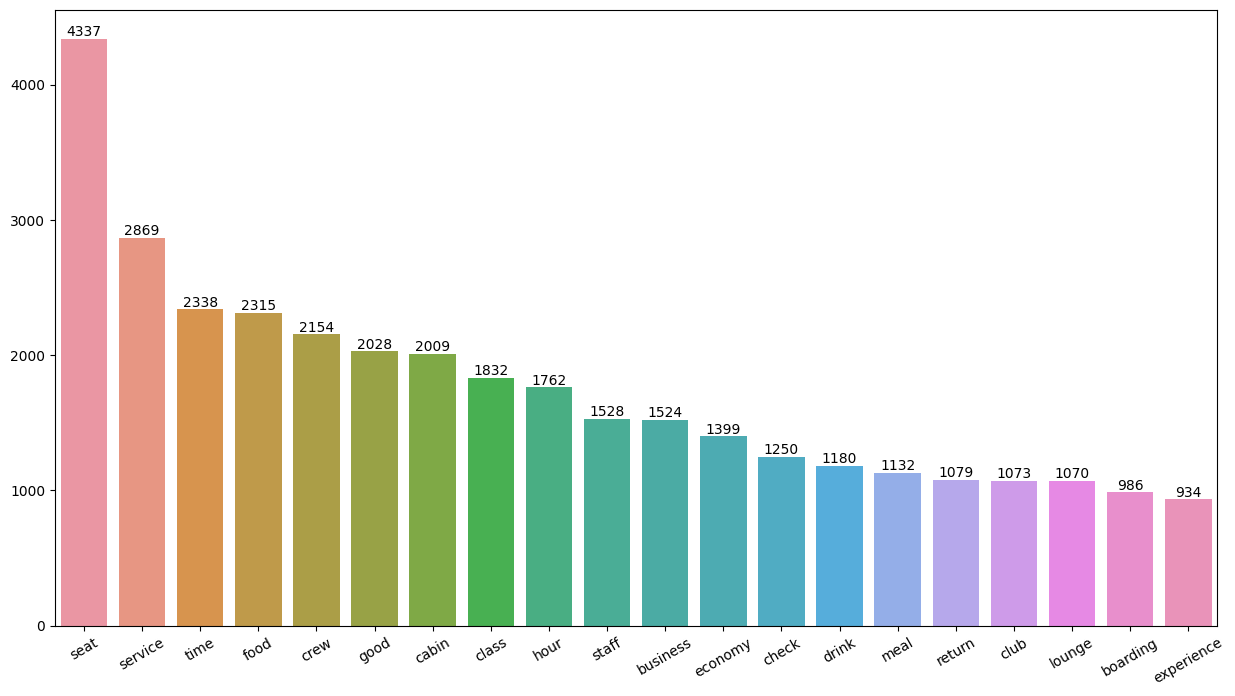

In [24]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

This provides us with a glimpse into the main topics of discussion among customers. It is evident that the "Seat" is the most frequently mentioned aspect of the airline, followed by "Service" and "Food," indicating their significance to customers in terms of overall experience. However, we still lack insights into the sentiment associated with each of these aspects. To gain a deeper understanding, we will employ n-gram plots to examine whether customers express positive or negative sentiments regarding these services.

# Word Frequency with N-gram

<Axes: >

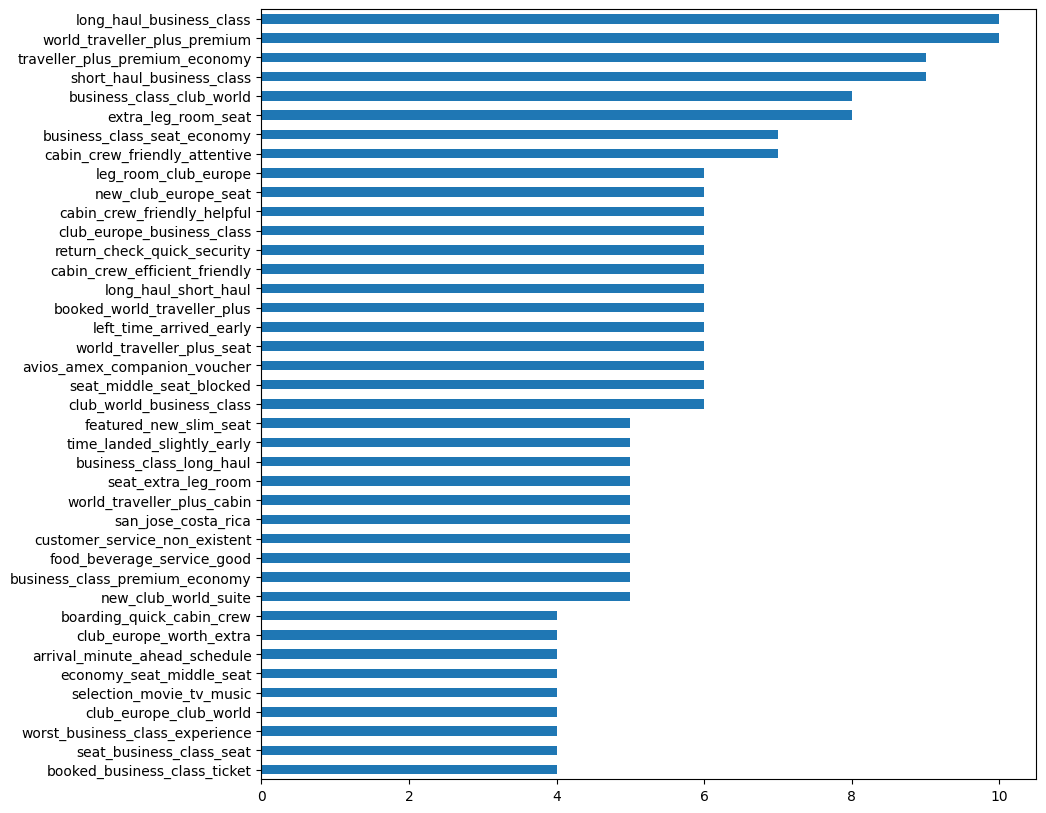

In [25]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

It is evident that there are numerous positive terms associated with the cabin crew. Examples include "cabin_crew_friendly_helpful," "cabin_crew_friendly_attentive," and "cabin_crew_friendly_efficient," among others. These reviews highlight the positive feedback customers have given regarding the cabin crew staff of British Airways.

However, we can explore another approach to gain a better understanding by analyzing word frequencies. We will group the reviews based on ratings. Specifically, we will consider ratings 1-3 as indicating bad reviews, 4-6 representing average/good experiences, and 7-10 reflecting a great experience.

In [26]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

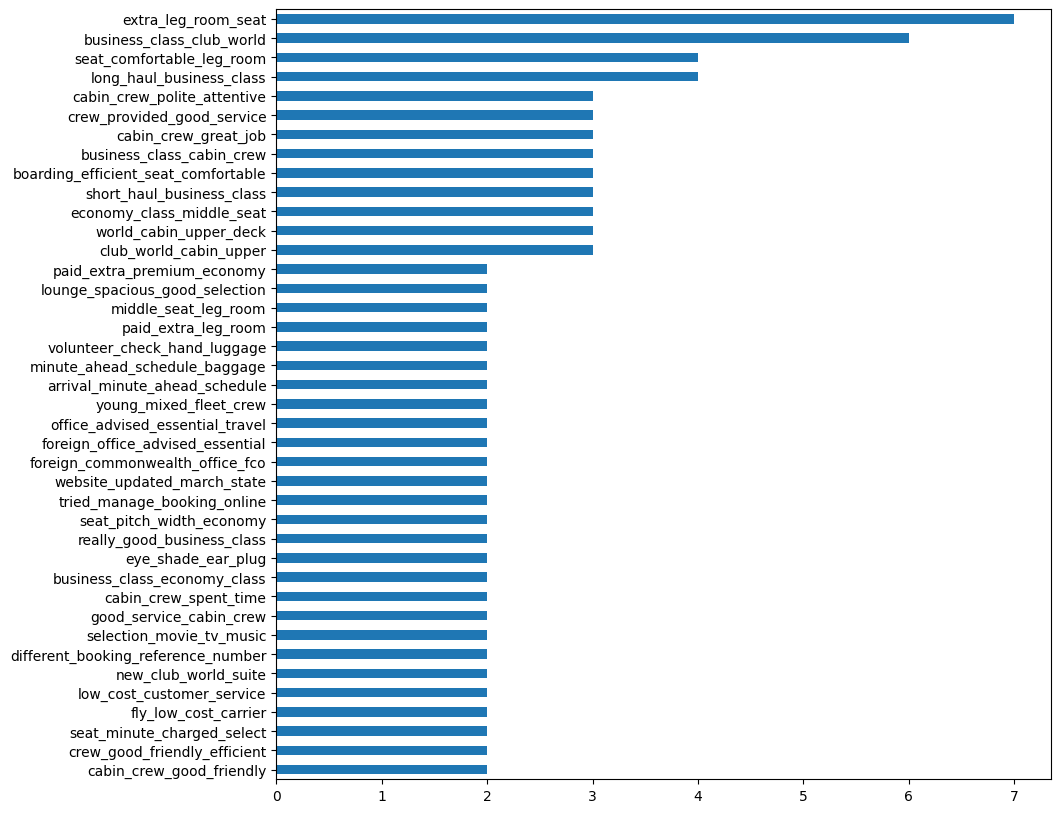

In [27]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

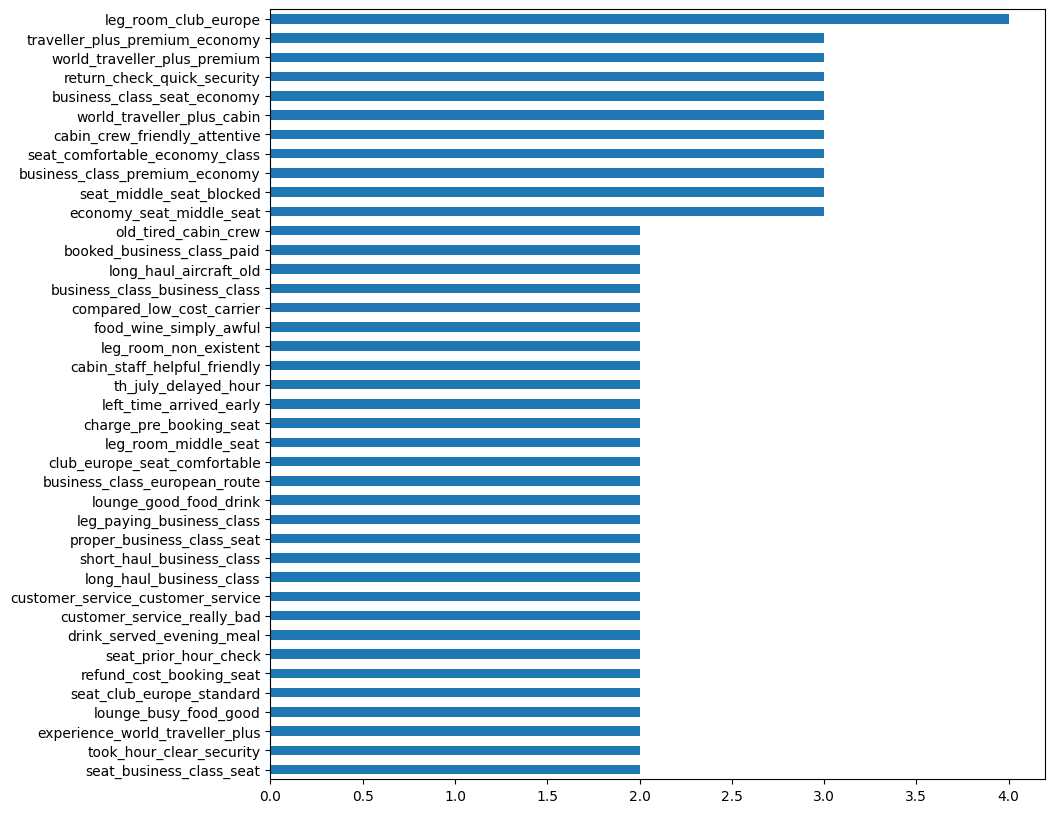

In [28]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

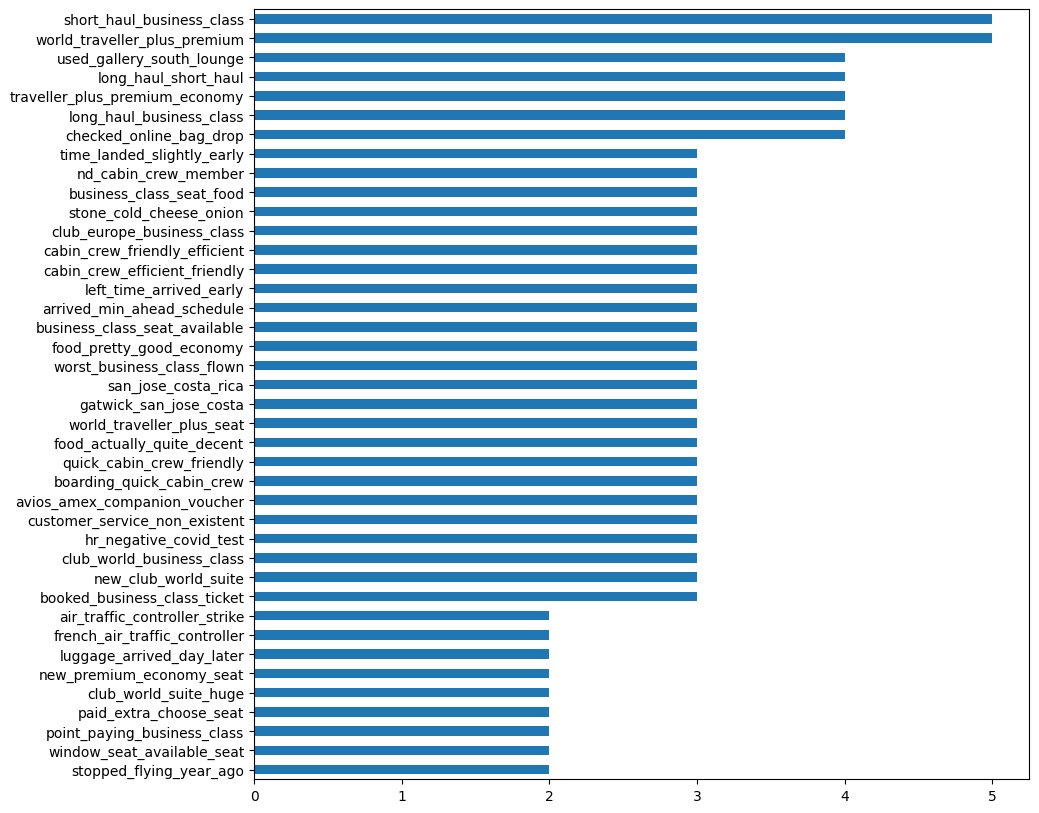

In [29]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)


Now, we will utilize the textblob library to determine the sentiment polarity of the text and assess its positivity or negativity, along with the degree of sentiment expressed.

In [30]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [31]:
print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2385 number of reviews between -0.2 and 0.2 polarity score
1381 number of reviews between -0.1 and 0.1 polarity score


The polarity score, ranging from -1 to 1, is used to determine the sentiment of a review. A score closer to -1 indicates a negative review, while a score closer to 1 indicates a positive review. In order to categorize the reviews, we can set a threshold. For example, considering a threshold of 0.2, any review with a polarity score greater than 0.2 would be considered positive, and any review with a score less than -0.2 would be considered negative. This would leave us with 2286 reviews falling within the neutral zone. To further refine the number of neutral reviews, we can lower the threshold to 0.1.

Another approach we can take to label the reviews as positive or negative is by using the VADER (Valence Aware Dictionary and sEntiment Reasoner) algorithm from the NLTK library.

In [32]:
%%capture
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0
    
for i in range(len(df.corpus)):
    
    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
df.label.value_counts()

label
 1    2303
-1    1125
 0     118
Name: count, dtype: int64

# Topic Modeling with LDA
We have already cleaned our reviews, however, for topic modeling we will also require word embeddings or (words matrix). For this purpose we will use count vectorizer method from sklearn library.

In [39]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer
#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation and get the feature names
tf_matrix = vect.fit_transform(df.corpus)
tf_feature_names = vect.get_feature_names_out()

In [40]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf_matrix)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [41]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words   
0            ba           446.3        flight           752.7            ba  \
1         class           337.1        airway           432.6       airline   
2        flight           265.7       british           429.2       service   
3      business           231.3            ba           352.8         class   
4         first           215.7      customer           324.4        london   
5          seat           157.8          seat           266.3          year   
6        lounge           136.8       service           253.1         staff   
7         plane           127.1        booked           226.2          food   
8        airway           114.9        london           224.1         first   
9       service           114.8        refund           222.8        review   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights   
0           242.5         staff            43.6        flight           805.6  \
1           133.9          crew            27.1            ba           791.6   
2            97.9         cabin            25.8          hour           259.8   
3            93.8        flight            20.3       airline           252.5   
4            85.8            ba            18.8         staff           222.5   
5            70.6         world            18.6          time           214.6   
6            70.4     passenger            16.8         delay           175.7   
7            70.2          club            16.5     passenger           167.1   
8            68.0      heathrow            16.0       service           164.2   
9            65.2           one            15.2       delayed           156.6   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words   
0          seat          2553.2        flight          2826.3        flight  \
1        flight          1572.6          good          1304.7          hour   
2            ba          1478.1          seat          1170.1           bag   
3          food          1081.0          time          1045.7          told   
4         cabin          1071.4            ba          1034.1            ba   
5       service           988.5       service          1029.5         would   
6          crew           974.4          food          1015.8        london   
7       economy           857.3          crew           986.0         check   
8         class           807.3        lounge           821.7       luggage   
9      business           639.7         cabin           780.7        airway   

  Topic 7 weights  
0          1191.5  
1           581.5  
2           453.8  
3           450.4  
4           419.7  
5           382.2  
6           359.1  
7           330.1  
8           319.3  
9           319.0

Certain words such as "British Airways", "passenger", "flight", etc. are not useful in detecting the overall tone of the reviews. These words are generic and do not provide significant insights into the sentiment expressed in the reviews. Therefore, it would be beneficial to exclude these words from our analysis.

# Topic modeling with NMF

In [42]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.05037115, 0.15961839],
       [0.04438432, 0.08659989],
       [0.02527451, 0.088469  ],
       ...,
       [0.11398055, 0.17036931],
       [0.02645368, 0.03557358],
       [0.10251806, 0.        ]])

In [43]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [44]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights
0          seat            22.8        flight            21.3
1            ba            12.3            ba             7.1
2         class             9.7          hour             4.7
3          food             7.9          time             4.2
4       service             7.8        london             3.7
5      business             7.7        airway             3.4
6         cabin             7.3       british             3.4
7          good             6.8       service             3.4
8          crew             6.6         would             3.0
9       economy             6.3         staff             2.6


Even with the NMF algorithm, we have observed that certain words like "seat" are not conclusive in determining the topics. To enhance the quality of our topic modeling results, it would be beneficial to exclude such words from the analysis.